In [1]:
from job_shop_lib import JobShopInstance, Operation


job_1 = [Operation(machines=0, duration=1), Operation(1, 1), Operation(2, 7)]
job_2 = [Operation(1, 5), Operation(2, 1), Operation(0, 1)]
job_3 = [Operation(2, 1), Operation(0, 3), Operation(1, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(
    jobs,
    name="Example",
    # Any extra parameters are stored inside the
    # metadata attribute as a dictionary:
    lower_bound=7,
)

In [2]:
from job_shop_lib.benchmarking import load_benchmark_instance

ft06 = load_benchmark_instance("ft06")

In [3]:
ft06.metadata

{'optimum': 55,
 'upper_bound': 55,
 'lower_bound': 55,
 'reference': "J.F. Muth, G.L. Thompson. 'Industrial scheduling.', Englewood Cliffs, NJ, Prentice-Hall, 1963."}

In [4]:
from job_shop_lib.generators import BasicGenerator

generator = BasicGenerator(
    duration_range=(5, 10), seed=42, num_jobs=5, num_machines=5
)
random_instance = generator.generate()

In [5]:
generator = BasicGenerator(iteration_limit=100, seed=42)
instances = []
for random_instance in generator:
    instances.append(random_instance)

# Or simply:
instances = list(generator)

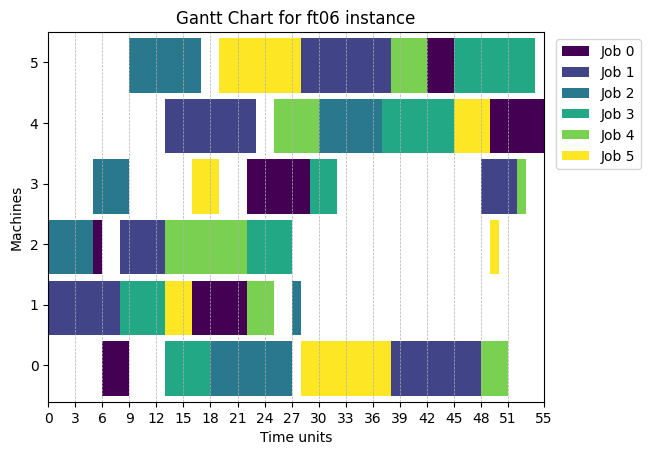

In [6]:
import matplotlib.pyplot as plt

from job_shop_lib.cp_sat import ORToolsSolver
from job_shop_lib.visualization import plot_gantt_chart

solver = ORToolsSolver(max_time_in_seconds=10)
ft06_schedule = solver(ft06)

fig, ax = plot_gantt_chart(ft06_schedule)
plt.show()

In [7]:
from job_shop_lib.visualization import create_gif, plot_gantt_chart_wrapper
from job_shop_lib.dispatching import DispatchingRuleSolver, DispatchingRule

plt.style.use("ggplot")

mwkr_solver = DispatchingRuleSolver("most_work_remaining")
plot_function = plot_gantt_chart_wrapper(
    title="Solution with Most Work Remaining Rule"
)
create_gif(
    gif_path="ft06_optimized.gif",
    instance=ft06,
    solver=mwkr_solver,
    plot_function=plot_function,
    fps=4,
)

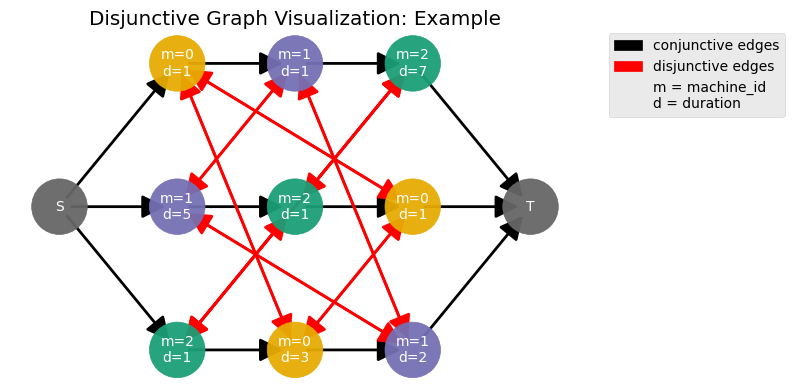

In [8]:
from job_shop_lib.visualization import plot_disjunctive_graph

fig = plot_disjunctive_graph(instance)
plt.show()

In [9]:
from job_shop_lib.graphs import build_disjunctive_graph

disjunctive_graph = build_disjunctive_graph(instance)
disjunctive_graph.nodes_by_type

defaultdict(list,
            {<NodeType.OPERATION: 1>: [Node(node_type=OPERATION, id=0, operation=O(m=0, d=1, j=0, p=0)),
              Node(node_type=OPERATION, id=1, operation=O(m=1, d=1, j=0, p=1)),
              Node(node_type=OPERATION, id=2, operation=O(m=2, d=7, j=0, p=2)),
              Node(node_type=OPERATION, id=3, operation=O(m=1, d=5, j=1, p=0)),
              Node(node_type=OPERATION, id=4, operation=O(m=2, d=1, j=1, p=1)),
              Node(node_type=OPERATION, id=5, operation=O(m=0, d=1, j=1, p=2)),
              Node(node_type=OPERATION, id=6, operation=O(m=2, d=1, j=2, p=0)),
              Node(node_type=OPERATION, id=7, operation=O(m=0, d=3, j=2, p=1)),
              Node(node_type=OPERATION, id=8, operation=O(m=1, d=2, j=2, p=2))],
             <NodeType.SOURCE: 5>: [Node(node_type=SOURCE, id=9)],
             <NodeType.SINK: 6>: [Node(node_type=SINK, id=10)]})

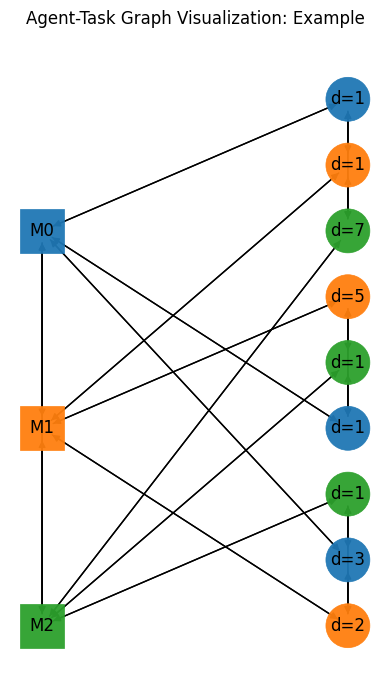

In [13]:
from job_shop_lib.graphs import build_agent_task_graph
from job_shop_lib.visualization import plot_agent_task_graph

agent_task_graph = build_agent_task_graph(instance)

fig = plot_agent_task_graph(agent_task_graph, figsize=(4, 7))
plt.show()

In [14]:
fig.savefig("agent_task_graph.png", dpi=300)